(1500, 26)
Index(['date', 'region', 'product', 'quantity', 'unitprice', 'storelocation',
       'customertype', 'discount', 'salesperson', 'totalprice',
       'paymentmethod', 'promotion', 'returned', 'orderid', 'customername',
       'shippingcost', 'orderdate', 'deliverydate', 'regionmanager', 'month',
       'year', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'revenue'],
      dtype='object')
                      date     quantity    unitprice     discount  \
count                 1500  1500.000000  1500.000000  1500.000000   
mean   2025-03-13 12:00:00    10.410667   298.826947     0.073133   
min    2023-02-23 00:00:00     1.000000     5.520000     0.000000   
25%    2024-03-03 18:00:00     5.000000   151.020000     0.000000   
50%    2025-03-13 12:00:00    11.000000   294.740000     0.050000   
75%    2026-03-23 06:00:00    15.000000   446.702500     0.100000   
max    2027-04-02 00:00:00    20.000000   599.720000     0.150000   
std                    Na

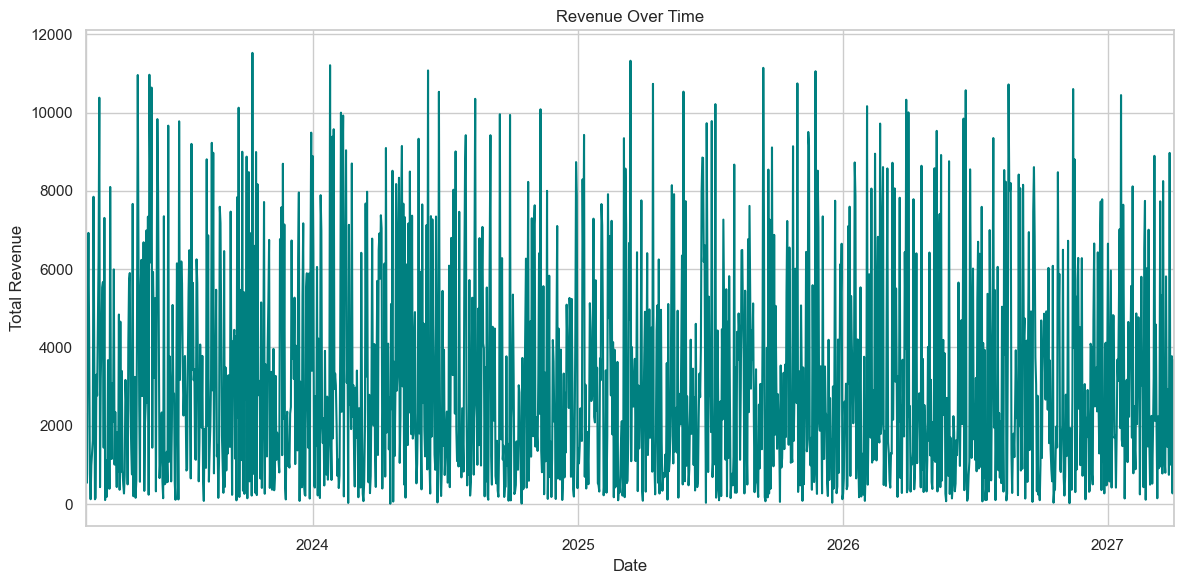

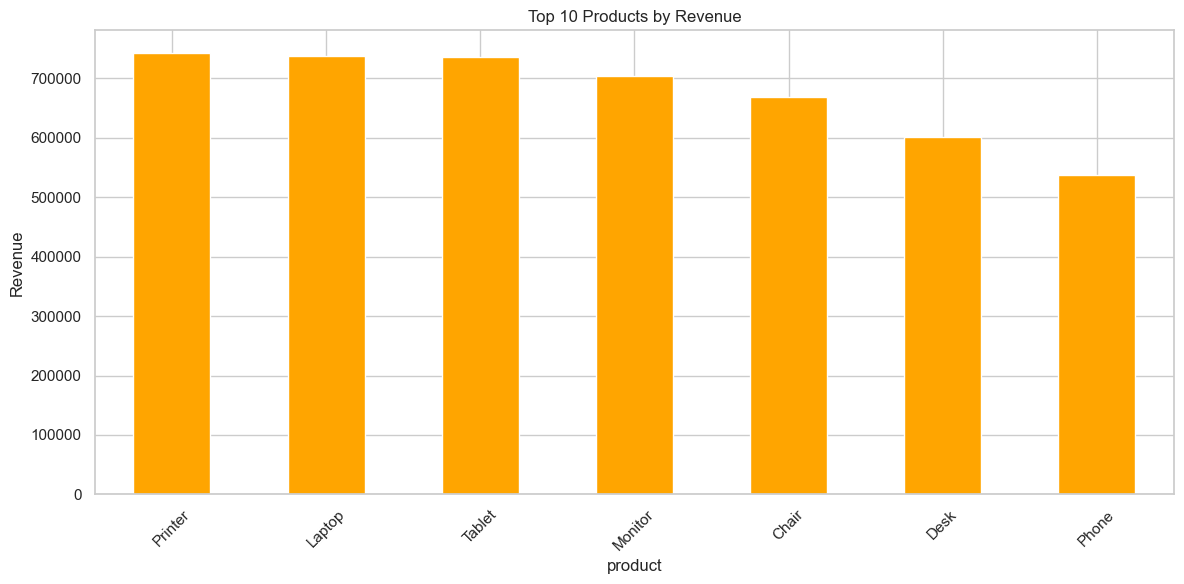

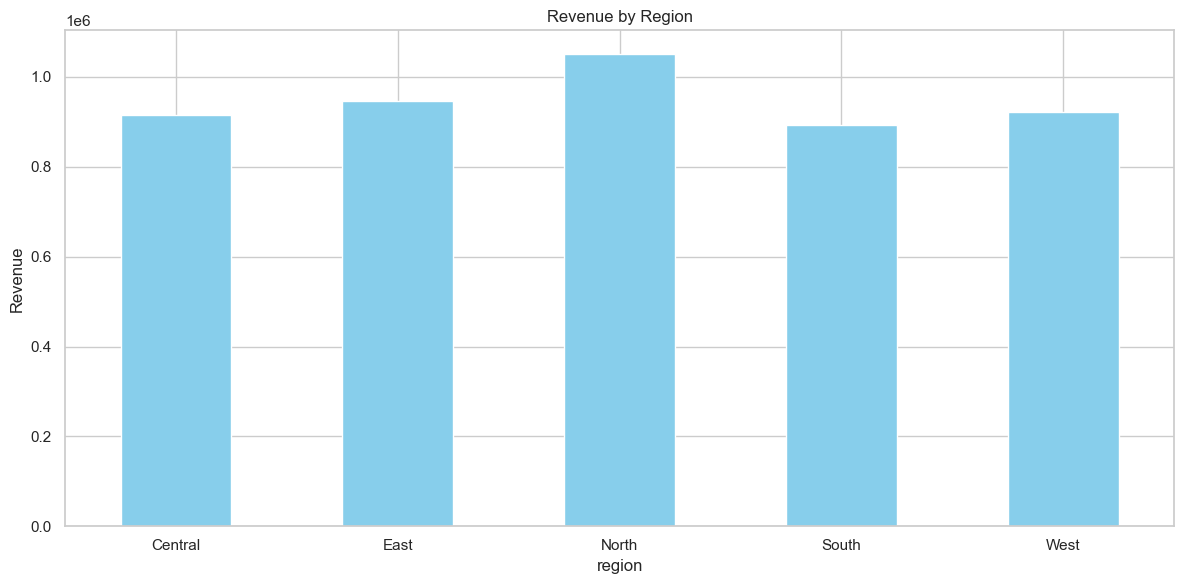

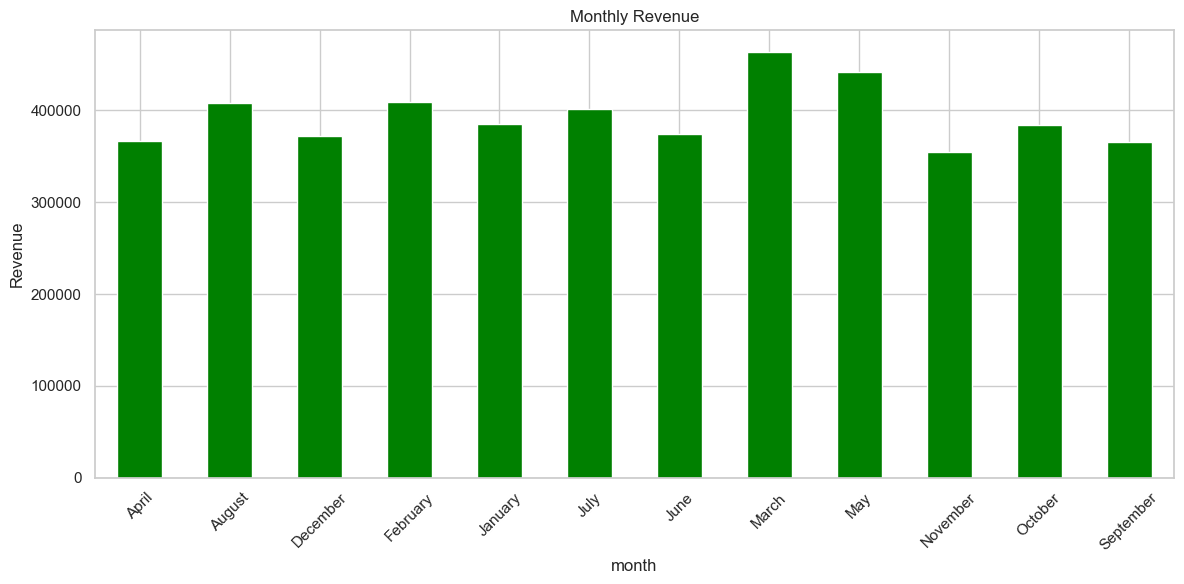

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('cleaned_product_sales.csv')

# Optional: convert date if needed
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Basic overview
print(df.shape)
print(df.columns)
print(df.describe())
print(df.info())

df['revenue'] = df['quantity'] * df['unitprice']
df.to_csv('cleaned_product_sales.csv', index=False)
revenue_by_date = df.groupby('date')['revenue'].sum()
revenue_by_date.plot(figsize=(12,6), color='teal')
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

top_products = df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='orange')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

region_revenue = df.groupby('region')['revenue'].sum()
region_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df['month'] = df['date'].dt.month_name()
monthly_revenue = df.groupby('month')['revenue'].sum()
monthly_revenue.plot(kind='bar', color='green')
plt.title("Monthly Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
